## Outliers Detection and Treatment

In this notebook we will learn how to detect outliers in the dataset and learn different methods to treat outliers. Outliers are treated by following methods:

    Trimming 
    Capping

Capping is further classied into different methods:

    Z-Score
    IQR
    Percentile
    Winsorization

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv('./Datasets/placement.csv')
df.shape

(1000, 3)

In [75]:
df.head(1)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1


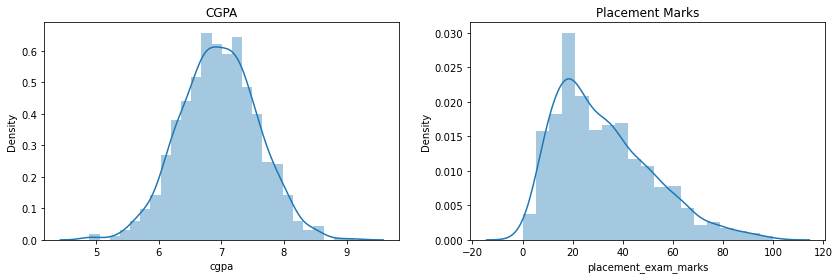

In [8]:
# Plotting to check distribution of the data
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['cgpa'])
plt.title('CGPA')

plt.subplot(122)
sns.distplot(df['placement_exam_marks'])
plt.title('Placement Marks')

plt.show()

From above plots we can see CGPA column data is normally distributed while Placement Marks data is right skewed. <br>

Z Score method is ideal for normally distributed data. <br>
IQR method is ideal for skewed data. <br><br><br>

## Z - Score

Z score method can be applied only on those feature whose data is normally distributed in this case Z-Score can be applied on CGPA column

In [10]:
# mean, std, min, max of CGPA column

print('Mean:', df['cgpa'].mean())
print('STD: ', df['cgpa'].std())
print('Min: ', df['cgpa'].min())
print('Max: ', df['cgpa'].max())

Mean: 6.96124000000001
STD:  0.6158978751323894
Min:  4.89
Max:  9.12


In [17]:
# Calculate boundary values
upperLimit = df['cgpa'].mean() + df['cgpa'].std()*3
lowerLimit = df['cgpa'].mean() - df['cgpa'].std()*3

print('Upperlimit :', upperLimit)
print('Lowerlimit :', lowerLimit)

Upperlimit : 8.808933625397177
Lowerlimit : 5.113546374602842


In [18]:
# Detect outliers
df[(df['cgpa'] > upperLimit) | (df['cgpa'] < lowerLimit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


So, we got 5 outliers, i.e., their cgpa values is beyond the limit that we have created and we need to fix these outliers. <br>
As discussed earlier we will use different techniques to see which one suits best.

### Trimming

In [28]:
# create new df without the outliers

new_df = df[(df['cgpa'] >= lowerLimit) & (df['cgpa'] <= upperLimit)]
new_df.shape

(995, 3)

As we can see these 5 outliers are gone and out data set rows reduced to 995.

### Capping

In [31]:
new_df = df
new_df['cgpa'] = np.where(new_df['cgpa']>upperLimit, 
                      upperLimit, 
                      np.where(new_df['cgpa']<lowerLimit,
                               lowerLimit,
                               new_df['cgpa']))

In [36]:
# check if outliers treated
new_df[new_df['cgpa']<lowerLimit]

,cgpa,placement_exam_marks,placed


Looks like outliers are fixed now.

## IQR
IQR is useful when data distribution is skewed

In [58]:
df = pd.read_csv('./Datasets/placement.csv')

Since IQR is helpful for skewed data, we will consider 'placement_exam_marks' feature this time.

In [59]:
df['placement_exam_marks'].skew() # right skewed

0.8356419499466834

<AxesSubplot:xlabel='placement_exam_marks'>

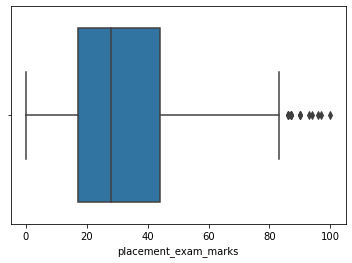

In [60]:
sns.boxplot(df['placement_exam_marks'])

From the boxplot we can confirm there are outlliers

In [81]:
# calculating IQR proximity
Q3 = df['placement_exam_marks'].quantile(0.75)
Q1 = df['placement_exam_marks'].quantile(0.25)

IQR = (Q3 - Q1)

upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)

print('upperLimit', upper_limit)
print('lowerLimit', lower_limit)

upperLimit 84.5
lowerLimit -23.5


In [82]:
# get values which are not in boundary limit
df[(df['placement_exam_marks']<lowerLimit) | (df['placement_exam_marks']>upperLimit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


From above analysis we can see there are outliers above upperLimit and no outliers are below lowerLimit. So we will treat only these outliers.

### Trimming

In [83]:
trim_df = df[df['placement_exam_marks']<=upper_limit]

### Plot
Plotting to check distribution of the data after trimming outliers with IQR technique

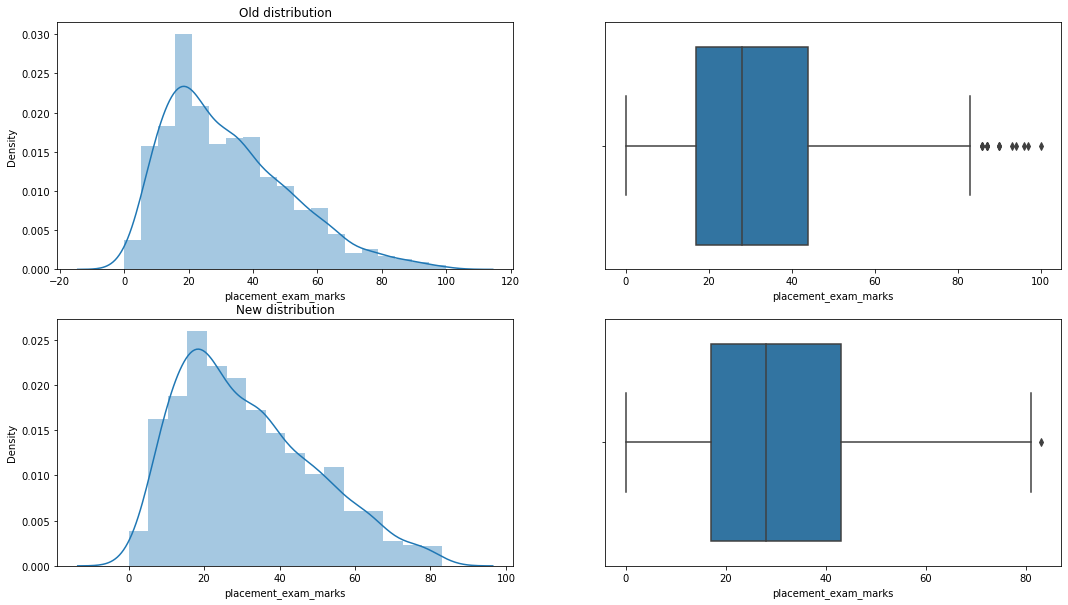

In [84]:
plt.figure(figsize=(18,10))

plt.subplot(221)
sns.distplot(df['placement_exam_marks'])
plt.title('Old distribution')

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(223)
sns.distplot(trim_df['placement_exam_marks'])
plt.title('New distribution')

plt.subplot(224)
sns.boxplot(trim_df['placement_exam_marks'])

plt.show()

In [86]:
trim_df[trim_df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


### Capping

In [87]:
cap_df = df
cap_df['placement_exam_marks'] = np.where(cap_df['placement_exam_marks']>upperLimit, 
                                          upperLimit,
                                          cap_df['placement_exam_marks'])

### Plotting
Now, lets compare our original data distribution with capped data distribution

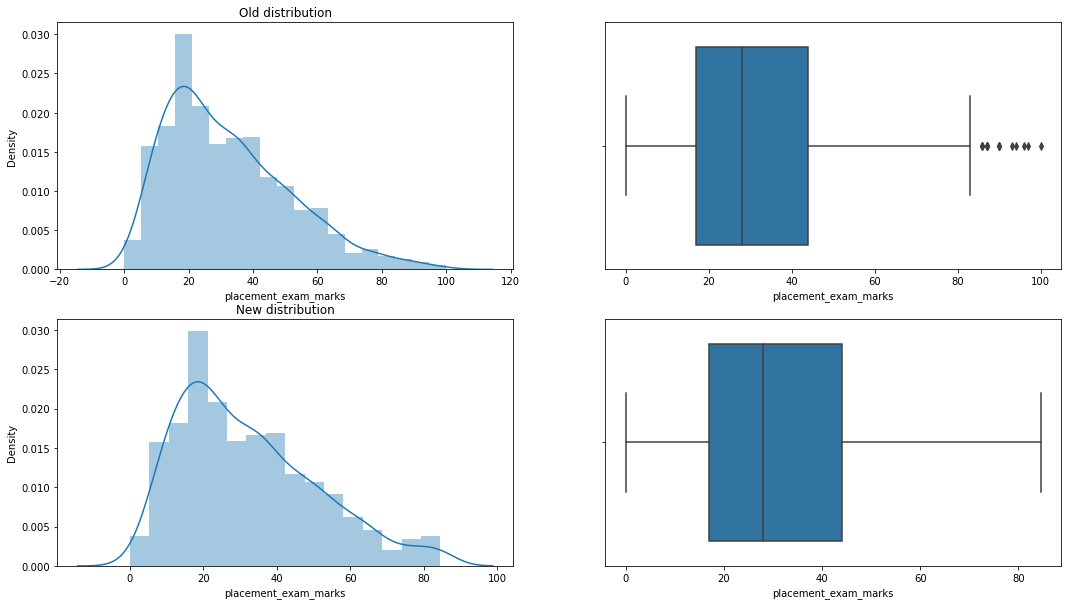

In [90]:
plt.figure(figsize=(18,10))

plt.subplot(221)
sns.distplot(df['placement_exam_marks'])
plt.title('Old distribution')

plt.subplot(222)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(223)
sns.distplot(cap_df['placement_exam_marks'])
plt.title('New distribution')

plt.subplot(224)
sns.boxplot(cap_df['placement_exam_marks'])

plt.show()

We can see all outliers are fixed. Observe the distplot, distribution changed slightly. This happened because we changed the values outliers.

### Percentiles

Let's understand what are percentiles.

Consider an array 

    arr = [10, 20, 35, 60, 75, 80, 90]
In this array: <br>
* 90 is the maximum value and this is the __100th__ percentile of the array <br>
* 10 is the lowest value so this will be the __0th__ percentile of the array. <br>
* 60 is the __50th__ percentile of the array as it is the __median__.

In [161]:
# importing csv
df2 = pd.read_csv('./Datasets/weight-height.csv')
df2.shape

(10000, 3)

In [95]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


PLotting distplots to check how the data is distributed

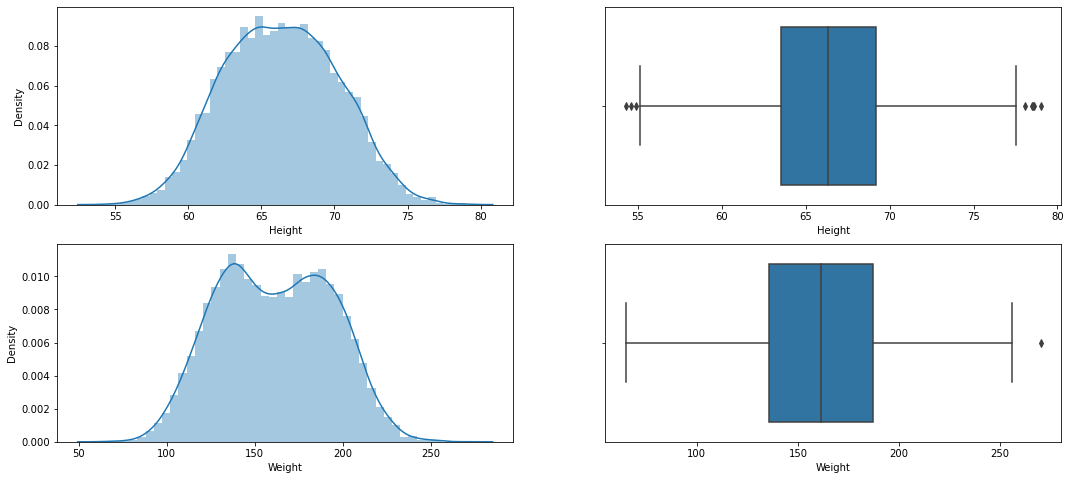

In [108]:
plt.figure(figsize=[18,8])

plt.subplot(221)
sns.distplot(df2['Height'])

plt.subplot(222)
sns.boxplot(df2['Height'])

plt.subplot(223)
sns.distplot(df2['Weight'])

plt.subplot(224)
sns.boxplot(df2['Weight'])

plt.show()

Looks like data is almost normally distributed for both features. <br>
Let's consider Height feature

In [158]:
# deciding threshold
top_limit = df2['Height'].quantile(0.99)
bottom_limit = df2['Height'].quantile(0.01)

print(top_limit)
print(bottom_limit)

74.78571507648495
58.134495462372655


In [138]:
# let's check the data which is out of our threshold boundary
df2[(df2['Height'] < bottom_limit) | (df2['Height'] > top_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


Looks like there are 200 rows that have values beyond our threshold boundary.

### Trimming

In [147]:
# we will trim out these 200 rows
trim_df2 = df2[(df2['Height'] >= bottom_limit) & (df2['Height'] <= top_limit)]
trim_df2.shape

(9800, 3)

### Plotting
  Lets plot and compare old and new distribution

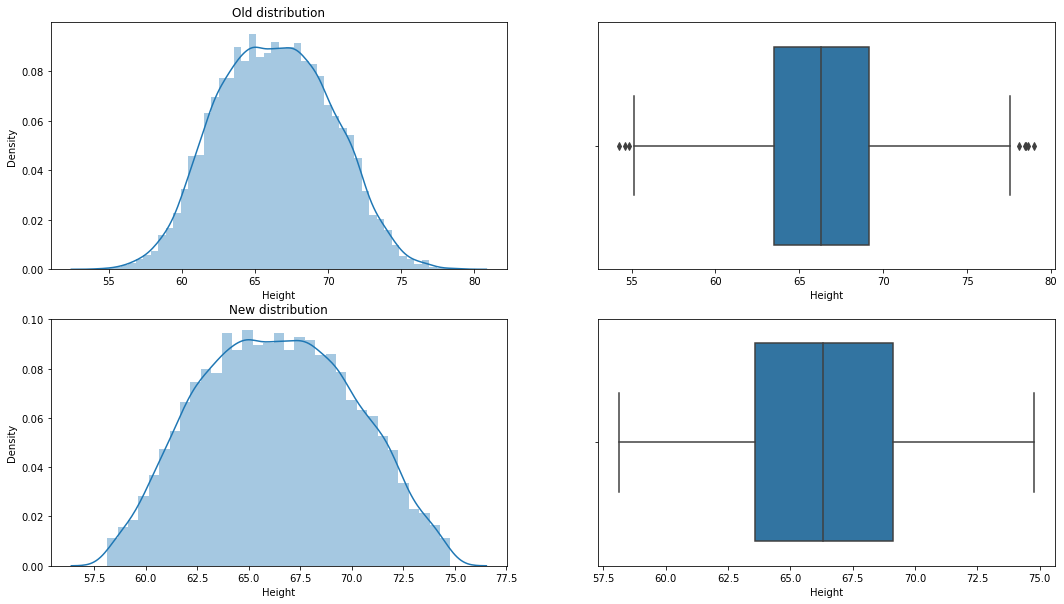

In [148]:
plt.figure(figsize=(18,10))

plt.subplot(221)
sns.distplot(df2['Height'])
plt.title('Old distribution')

plt.subplot(222)
sns.boxplot(df2['Height'])

plt.subplot(223)
sns.distplot(trim_df2['Height'])
plt.title('New distribution')

plt.subplot(224)
sns.boxplot(trim_df2['Height'])

plt.show()

We can see the outliers are treated and the distribution has slightly changed but still looks normally distributed.

### Capping

In [159]:
cap_df2 = df2
cap_df2['Height'] = np.where(cap_df2['Height'] > top_limit, 
                             top_limit,
                             np.where(cap_df2['Height']<bottom_limit,
                                      bottom_limit,
                                      cap_df2['Height']))

### Plotting
Comparing old data distribution with capped data distribution this time.

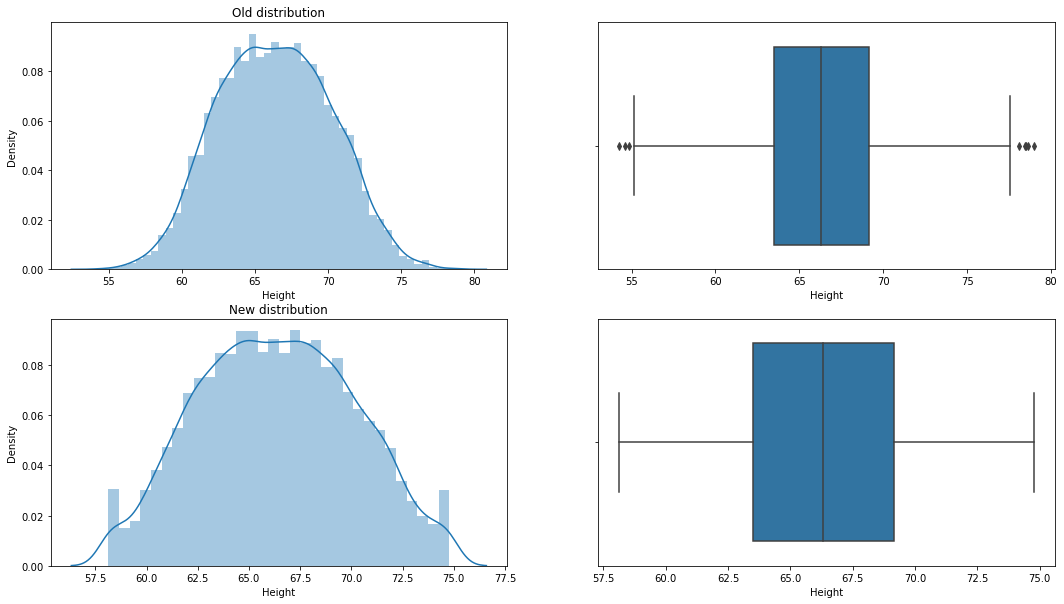

In [163]:
plt.figure(figsize=(18,10))

plt.subplot(221)
sns.distplot(df2['Height'])
plt.title('Old distribution')

plt.subplot(222)
sns.boxplot(df2['Height'])

plt.subplot(223)
sns.distplot(cap_df2['Height'])
plt.title('New distribution')

plt.subplot(224)
sns.boxplot(cap_df2['Height'])

plt.show()

We can see outliers are treated well, but distribution has changed more this time. This happened because we have capped the outliers.

## Summary

In this notebook we learnt how to detect Outliers, treat outliers using Z-Score, IQR, Percentile methods by trimming and capping the outliers. 